In [ ]:
mickey pip install split-folders

In [ ]:
from tensorflow import keras
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import Dense,Dropout, GlobalAveragePooling2D,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
import json
from keras import regularizers
from google.colab import files
import h5py
import pickle
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
%matplotlib inline
import pandas as pd
import cv2
import os
import shutil
#import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_save = '/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/Anulata'
if os.path.isdir(root_save) == 1:
  print ('done')
else:
  print('False')

done


Buat folder class

In [ ]:
url = '/content/drive/MyDrive/MODEL DL HOYA/DATA/MENTAH_CROP/'
dirlist = os.listdir(url)
for dir in dirlist : #ada

  try :
      os.makedirs('/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN/'+dir, exist_ok = True)
  except OSError as error:
    print("Directory '%s' can not be created" %dir)

**RESIZE CITRA**

In [ ]:
root = '/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/'
root_save = '/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN20/DATA/'
os.path.isdir(root_save)
list_dir = os.listdir(root) # your directory path
for dir in list_dir : #ada
  if os.path.isdir(root_save+dir)== 0:
    try :
      os.makedirs(root_save+dir, exist_ok = True)
    except OSError as error:
      print("Directory '%s' can not be created" %dir)
    list_file = os.listdir(root + dir + '/') # your directory path

    for file_name in list_file:
      url = root + dir + os.sep + file_name
      print(url)
      img = cv2.imread(url, cv2.IMREAD_UNCHANGED)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      print('Original Dimensions : ',img.shape)

      scale_percentx = 150/img.shape[0]
      scale_percenty = 150/img.shape[1] # percent of original size
      width = round(RGB_img.shape[0] * scale_percentx)
      height = round(RGB_img.shape[1] * scale_percenty)
      dim = (width, height)

      # resize image
      resized = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
      url_save = root_save + dir + os.sep + file_name
      #print('url_save',url_save)
      cv2.imwrite(url_save, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
      print('resize Dimensions : ',resized.shape)


/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/9.JPG
Original Dimensions :  (2434, 2434, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/8.JPG
Original Dimensions :  (2300, 2300, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/17.JPG
Original Dimensions :  (3214, 3214, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/15.JPG
Original Dimensions :  (2162, 2162, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/14.JPG
Original Dimensions :  (3452, 3452, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/13.JPG
Original Dimensions :  (3040, 3040, 3)
resize Dimensions :  (150, 150, 3)
/content/drive/MyDrive/MODEL DL HOYA/DATA/DAUN_20an/Gunung Lawu Lumajang/12.JP

JUMLAH DATA

In [ ]:
url = '/content/drive/MyDrive/HOYA/DAUN20/DATA'
list_dir = os.listdir(url)
list_dir.sort()
Total=0
for dir in list_dir:
  print(dir)
  listfile = os.listdir(url+'/'+dir)
  print(len(listfile))
  Total = Total+len(listfile)
  #for f in listfile:
  #  n = os.listdir(url+dir+'/'+f)
print(Total)

Amicabilis
22
Anulata
21
Australis
16
Callistophylla
29
Dolichosparte
29
Garut 1
20
Gunung Lawu Lumajang
24
Hypolasia
23
Incurvula
25
Mamasa
32
Minahassae
28
Monetteae
35
Obovata
24
Polypus
25
Polypus kalteng
22
Rigidifolia
21
Surisana
21
Towutiensis
41
Unchinata
33
Vitellina
26
Vittelinoides
34
Walicii ssp Tenebrosa
21
campanulata white
35
caudata
25
occultata silver
21
waymaniae
35
688


JUMLAH DATA

In [ ]:
image_size = 150
batch_size = 32

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN20/DATA", # The location of dataset
                   output="/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN20/train/", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 688 files [00:12, 54.81 files/s]


In [ ]:
url = "/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN20/train/"
list_dir = os.listdir(url)
#print(len(list_dir))
for dir in list_dir :
  listtrain = os.listdir(url+dir)
  print(dir)
  for list_file in listtrain:

    f = os.listdir(url+dir+'/'+list_file)
    print(len(f))


train
16
23
28
14
11
24
14
14
20
17
17
18
14
17
14
20
15
16
22
19
14
15
16
24
24
23
val
4
6
8
4
3
7
4
4
5
5
5
5
4
5
4
5
4
4
6
5
4
4
4
7
7
6
test
4
5
5
3
2
4
3
3
4
3
3
3
2
3
3
4
3
3
4
4
3
3
4
4
4
4


In [ ]:
splitfolders.ratio("/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/BUNGA/Data/", # The location of dataset
                   output="/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/BUNGA/train/", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

In [ ]:
# folders with train dir & val dir
train_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/train'
val_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/val'
test_dir = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
#
input_shape = (image_size, image_size, 3)


augmented data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                              samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = True,
                              height_shift_range= 0.05,
                              width_shift_range=0.2,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.2)

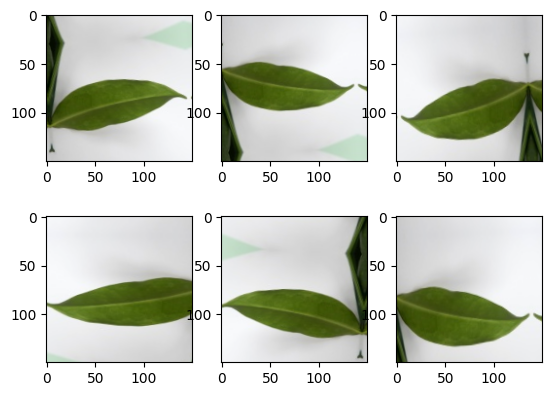

In [ ]:
root = '/content/drive/MyDrive/MODEL DL HOYA/DATA/OLAH/DAUN10/DATA/'
os.path.isdir(root)
list_dir = os.listdir(root) # your directory path
list_dir[1]
for dir in list_dir : #ada
  list_file = os.listdir(root + dir + '/') # your directory path
  for file_name in list_file:
    url = root + dir + os.sep + file_name
    img = image.load_img(url, target_size=(image_size, image_size))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 1
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(2,3,i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 7 == 0:
            break
    break;

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 469 images belonging to 26 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 129 images belonging to 26 classes.


In [ ]:
val_generator.class_indices

{'Amicabilis': 0,
 'Anulata': 1,
 'Australis': 2,
 'Callistophylla': 3,
 'Dolichosparte': 4,
 'Garut 1': 5,
 'Gunung Lawu Lumajang': 6,
 'Hypolasia': 7,
 'Incurvula': 8,
 'Mamasa': 9,
 'Minahassae': 10,
 'Monetteae': 11,
 'Obovata': 12,
 'Polypus': 13,
 'Polypus kalteng': 14,
 'Rigidifolia': 15,
 'Surisana': 16,
 'Towutiensis': 17,
 'Unchinata': 18,
 'Vitellina': 19,
 'Vittelinoides': 20,
 'Walicii ssp Tenebrosa': 21,
 'campanulata white': 22,
 'caudata': 23,
 'occultata silver': 24,
 'waymaniae': 25}

In [ ]:
#optional
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 90 images belonging to 26 classes.


In [ ]:
base_model121 = densenet.DenseNet121(weights='/content/drive/MyDrive/HOYA/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)


In [ ]:
base_model121 = densenet.DenseNet121(weights='/content/drive/MyDrive/HOYA/new_weights_densenet121.h5', include_top=False)


ValueError: ignored

In [ ]:
base_model121.output

<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
base_model169.output

<KerasTensor: shape=(None, None, None, 1664) dtype=float32 (created by layer 'relu')>

In [ ]:
classes_num = 26 #numberclass we have
validation_steps = 100

In [ ]:
x = base_model121.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(8, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x = base_model169.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = regularizers.l1_l2(0.01),activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(classes_num, activation='softmax')(x)

In [ ]:
x

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dropout_23')>

In [ ]:
preds

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_39')>

In [ ]:
model = Model(inputs=base_model121.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

435
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, None, None,   0          ['input_3[0][0]']                
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_4[0][0]']       
                                64)                                                       

In [ ]:
model = Model(inputs=base_model169.input, outputs=preds)


# cetak arsitektur
print(len(model.layers))
print(model.summary())

# mengatur parameter yang tidak akan diubah (freeze) dan diubah (unfreeze)
n_freeze = 300

for layer in model.layers[:n_freeze]:
    layer.trainable=False

for layer in model.layers[n_freeze:]:
    layer.trainable=True


opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_generator

TESTING MODEL

In [ ]:
cls_val = val_generator.classes
cls_test = test_generator.classes
val_labels=np.array(cls_val)
test_labels=np.array(cls_test)
print(val_labels)
print(test_labels)

[ 0  0  0  0  1  1  1  1  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5
  5  6  6  6  6  7  7  7  7  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10
 10 11 11 11 11 11 11 11 12 12 12 12 13 13 13 13 13 14 14 14 14 15 15 15
 15 16 16 16 16 17 17 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 24 24
 24 24 25 25 25 25 25 25 25]
[ 0  0  0  1  1  1  2  2  3  3  3  3  4  4  4  4  5  5  6  6  6  6  7  7
  7  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12 12 13 13 13 14
 14 14 15 15 15 16 16 16 17 17 17 17 17 18 18 18 18 19 19 19 20 20 20 20
 20 21 21 21 22 22 22 22 23 23 23 24 24 24 25 25 25 25]


MODEL IDENTIFICATION

In [ ]:
# menyimpan model terbaik sebagai model baru
filepath = "/content/drive/MyDrive/HOYA/Pretrain.densenet.hdf5"

metric = 'val_accuracy'
checkpoint = ModelCheckpoint(filepath, monitor=metric, verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

step_size_train = 100

history=model.fit(train_generator, epochs=60, validation_data=val_generator)
#history = model.fit(train_generator, ytrain, epochs=100,validation_data = (test_generator, yval))

print(history.history.keys())

with open('/content/drive/MyDrive/HOYA/proses.json', 'w') as f:
    json.dump(history.history, f)


#save model akhir

model.save('/content/drive/MyDrive/HOYA/arsiktektur_densenet121.h5')

model.save_weights('/content/drive/MyDrive/HOYA/new_weights_densenet121.h5')

Epoch 1/60
15/15 [==============================] - 214s 13s/step - loss: 29.2524 - accuracy: 0.0469 - val_loss: 25.2865 - val_accuracy: 0.0543
Epoch 2/60
15/15 [==============================] - 53s 3s/step - loss: 21.8548 - accuracy: 0.0853 - val_loss: 18.4612 - val_accuracy: 0.1473
Epoch 3/60
15/15 [==============================] - 52s 4s/step - loss: 15.7654 - accuracy: 0.1215 - val_loss: 13.2657 - val_accuracy: 0.1550
Epoch 4/60
15/15 [==============================] - 51s 3s/step - loss: 11.2754 - accuracy: 0.1087 - val_loss: 9.6373 - val_accuracy: 0.1163
Epoch 5/60
15/15 [==============================] - 51s 3s/step - loss: 8.4250 - accuracy: 0.1727 - val_loss: 7.5284 - val_accuracy: 0.1240
Epoch 6/60
15/15 [==============================] - 51s 3s/step - loss: 6.9460 - accuracy: 0.1663 - val_loss: 6.3454 - val_accuracy: 0.2171
Epoch 7/60
15/15 [==============================] - 53s 4s/step - loss: 6.0460 - accuracy: 0.1684 - val_loss: 5.5876 - val_accuracy: 0.2171
Epoch 8/60


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/HOYA/arsiktektur_densenet121.h5')
#model.save('/content/drive/MyDrive/PENGENALAN POLA/arsiktektur_densenet121.h5')
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                         

Text(0.5, 1.0, 'DenseNet121')

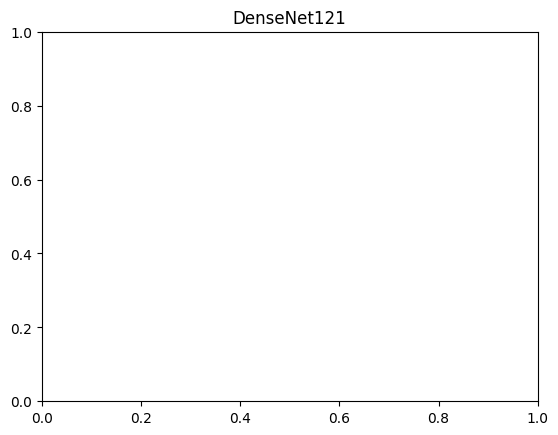

In [ ]:
plt.title('DenseNet121')

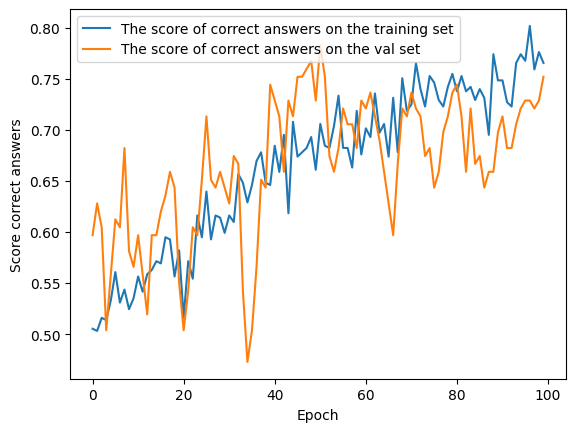

In [ ]:
plt.plot(history.history['accuracy'], label='The score of correct answers on the training set')
plt.plot(history.history['val_accuracy'], label='The score of correct answers on the val set')
plt.xlabel('Epoch')
plt.ylabel('Score correct answers')
plt.legend()
plt.show()

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(val, val_labels)

print('Test accuracy:', test_acc)

Predict

In [ ]:
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    print(url_img)
    img = image.load_img(url_img, target_size=(image_size, image_size))
    plt.imshow(img)
    plt.show()
    break;

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
class_names=val_generator.class_indices
print(class_names)

{'Amicabilis': 0, 'Anulata': 1, 'Australis': 2, 'Callistophylla': 3, 'Dolichosparte': 4, 'Garut 1': 5, 'Gunung Lawu Lumajang': 6, 'Hypolasia': 7, 'Incurvula': 8, 'Mamasa': 9, 'Minahassae': 10, 'Monetteae': 11, 'Obovata': 12, 'Polypus': 13, 'Polypus kalteng': 14, 'Rigidifolia': 15, 'Surisana': 16, 'Towutiensis': 17, 'Unchinata': 18, 'Vitellina': 19, 'Vittelinoides': 20, 'Walicii ssp Tenebrosa': 21, 'campanulata white': 22, 'caudata': 23, 'occultata silver': 24, 'waymaniae': 25}


In [ ]:
dir_class.sort()
print(dir_class)

['Amicabilis', 'Anulata', 'Australis', 'Callistophylla', 'Dolichosparte', 'Garut 1', 'Gunung Lawu Lumajang', 'Hypolasia', 'Incurvula', 'Mamasa', 'Minahassae', 'Monetteae', 'Obovata', 'Polypus', 'Polypus kalteng', 'Rigidifolia', 'Surisana', 'Towutiensis', 'Unchinata', 'Vitellina', 'Vittelinoides', 'Walicii ssp Tenebrosa', 'campanulata white', 'caudata', 'occultata silver', 'waymaniae']


In [ ]:
print(dir_class)


['Amicabilis', 'Anulata', 'Australis', 'Callistophylla', 'Dolichosparte', 'Garut 1', 'Gunung Lawu Lumajang', 'Hypolasia', 'Incurvula', 'Mamasa', 'Minahassae', 'Monetteae', 'Obovata', 'Polypus', 'Polypus kalteng', 'Rigidifolia', 'Surisana', 'Towutiensis', 'Unchinata', 'Vitellina', 'Vittelinoides', 'Walicii ssp Tenebrosa', 'campanulata white', 'caudata', 'occultata silver', 'waymaniae']


In [ ]:
aaa = dir_class[1]
print(aaa)

Anulata


In [ ]:
akurasi = 0
img_path = '/content/drive/MyDrive/HOYA/DAUN20/train/test'
dir_class = os.listdir(img_path)
dir_class.sort()
for f in dir_class:
  file_img = os.listdir(img_path+'/'+f)
  for i in file_img :
    url_img = img_path+ '/'+f+'/'+i
    img = image.load_img(url_img, target_size=(image_size, image_size))
    img_array = image.img_to_array(img)
    img_array /= 255
    img_test= np.expand_dims(img_array, axis=0)
    result = model.predict(img_test)
    hasil=np.argmax(result,axis=1)

    cls = dir_class[int(hasil)]

    print ([f+ ' prediksi ' + cls])
    if f == cls:
      akurasi +=1
print('Akurasi = ', akurasi/90)

1/1 [==============================] - 0s 179ms/step
['Amicabilis prediksi occultata silver']
1/1 [==============================] - 0s 198ms/step
['Amicabilis prediksi campanulata white']
1/1 [==============================] - 0s 319ms/step
['Amicabilis prediksi Amicabilis']
1/1 [==============================] - 0s 369ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 165ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 170ms/step
['Anulata prediksi Anulata']
1/1 [==============================] - 0s 181ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 188ms/step
['Australis prediksi Australis']
1/1 [==============================] - 0s 178ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 197ms/step
['Callistophylla prediksi Callistophylla']
1/1 [==============================] - 0s 176ms/step
['Callistophylla prediksi Callistophylla']
1/1 [============

In [ ]:
prediction = new_model.predict(test_generator)

3/3 [==============================] - 7s 2s/step


In [ ]:
result=[]
num= len(prediction)
for a in range(num):
  y = list(prediction[a])
  xx=y.index(max(y))
  result.append(xx)

print(result)
print(test_labels)

[24, 24, 21, 20, 17, 24, 10, 25, 23, 9, 10, 0, 17, 7, 9, 15, 20, 13, 2, 13, 22, 22, 17, 20, 25, 4, 9, 21, 20, 24, 18, 10, 25, 3, 19, 25, 17, 17, 20, 22, 12, 8, 7, 10, 5, 15, 2, 1, 3, 22, 22, 20, 3, 10, 8, 1, 8, 15, 14, 19, 20, 23, 12, 19, 14, 12, 1, 7, 4, 18, 20, 4, 16, 11, 24, 23, 24, 15, 6, 22, 10, 22, 3, 12, 9, 19, 15, 11, 22, 24]
[ 0  0  0  1  1  1  2  2  3  3  3  3  4  4  4  4  5  5  6  6  6  6  7  7
  7  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12 12 13 13 13 14
 14 14 15 15 15 16 16 16 17 17 17 17 17 18 18 18 18 19 19 19 20 20 20 20
 20 21 21 21 22 22 22 22 23 23 23 24 24 24 25 25 25 25]


In [ ]:
akurasi = 0
for b in range(num):
  if test_labels[b] == result[b]:
    akurasi+=1

print(akurasi)

3


In [ ]:
print(classification_report(cls_test, x, target_names = test_labels))


TypeError: ignored

In [ ]:
l=range(10)
list(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:


listy=list()
for i in range(len(y)):
  x = xx[i]
  maxyi=max(x)
  a =x.index(maxyi)
  listy.append(a)




[1, 2]
1
[1]
[2, 1]
0
[1, 0]
